### Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

data = pd.read_csv('non_linear.csv', sep=',')
#data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


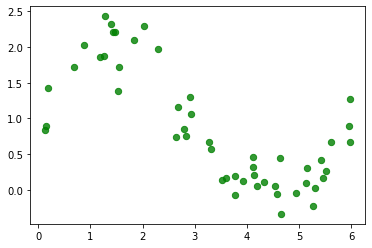

In [17]:
# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

In [18]:
def gradient(X, y, w, lam) -> np.array:
    # Количество элементов обучающей выборки
    n = X.shape[0]
    #прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку
    error = y-y_hat
    # вычисляем градиент
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0/n +2*lam*w 
    return grad, error

In [19]:
def eval_w_next(X, y, eta, w_current, lam):
    # вычислить градиент
    grad, error = gradient(X, y, w_current, lam)
    # делаем шаг
    w_next = w_current - eta*grad
    # условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

In [20]:
def gradient_descent(X, y, eta=0.01, epsilon=0.001, lam=0.1):
    m = X.shape[1] # число фичей - это размерность градиента
    w = np.random.random(m).reshape(1,-1) 
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lam)
    step = 0
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lam)
        step += 1
        if step%100 == 0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

In [23]:
X = data.x_train.values.reshape(-1,1)
n = X.shape[0]
X = np.hstack(
    [np.ones(n).reshape(-1,1),
    X
    ])
X.shape

(50, 2)

In [22]:
w = gradient_descent(X, data.y_train.values.reshape(-1,1), eta=0.0085, epsilon=0.001)


step 100 |w-w_next|=0.00411, grad=[[-0.47055727  0.11338232]]
step 200 |w-w_next|=0.00247, grad=[[-0.28249942  0.06806916]]
step 300 |w-w_next|=0.00148, grad=[[-0.16959875  0.04086537]]


В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.